In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn
import sklearn
import yaml
import math
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [53]:
data_test = pd.read_csv("data/prep/data_test_cleaned.csv")
data_train = pd.read_csv("data/prep/data_train_cleaned.csv")

In [54]:
data_train = data_train.drop("Unnamed: 0",axis=1)
data_test = data_test.drop("Unnamed: 0",axis=1)

In [55]:
from sklearn.preprocessing import LabelEncoder

class autoLabelEncoder:
    def __init__(self) -> None:
        self.cat_encoders:dict = {}

    def fit(self, data:pd.DataFrame, categories:list[str]) -> None:
        for feat in categories:
            enc = LabelEncoder()
            self.cat_encoders[feat] = enc.fit(data.loc[data[feat].notna(), feat])

    def transform(self, data:pd.DataFrame, categories:list[str]) -> pd.DataFrame:
        for feat in categories:
            enc = self.cat_encoders[feat]
            print(feat)
            data.loc[data[feat].notna(), feat] = enc.transform(data.loc[data[feat].notna(), feat])
        return data
    
    def get_encoder(self, category) -> LabelEncoder:
        return self.cat_encoders[category]

In [56]:
def feat(q):
    if str(q) == "nan" or q == np.nan:
        return np.nan
    else:
        return q[0]

In [57]:
data_train["Cabin"] = np.array(map(lambda q: feat(q),data_train["Cabin"]))
data_test["Cabin"] = np.array(map(lambda q: feat(q),data_test["Cabin"]))

In [58]:
ale = autoLabelEncoder()

cat = list(data_train.select_dtypes(include=['object']).columns)

ale.fit(data_train, cat)
data_train = ale.transform(data_train,cat)
data_test = ale.transform(data_test,cat)


HomePlanet
CryoSleep
Cabin
Destination
VIP
HomePlanet
CryoSleep
Cabin
Destination
VIP


In [59]:
corr1 = data_train.corr()

In [60]:
data_train["Way"] = data_train["HomePlanet"].astype(str) + data_train["Destination"].astype(str)
data_test["Way"] = data_test["HomePlanet"].astype(str) + data_test["Destination"].astype(str)


for i in range(len(data_train["Way"])):
    if "nan" in str(data_train["Way"][i]):
        data_train["Way"][i] = np.nan


for i in range(len(data_test["Way"])):
    if "nan" in str(data_test["Way"][i]):
        data_test["Way"][i] = np.nan

In [61]:
data_train = data_train.dropna()
data_test = data_test.dropna()

In [62]:
target = data_train["Transported"]
data_train = data_train.drop("Transported",axis=1)

In [63]:
cat1 = data_train.columns[data_train.isnull().any()].tolist()
cat2 = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat1 = [x for x in cat1 if x not in cat2]

In [64]:
# from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# class reconclfNan:
#     def __init__(self) -> None:
#         self.models = {}
    
#     def fit(self, data:pd.DataFrame, categories:list[str]) -> None:
#         data = data.dropna().copy()
#         for i in categories:
#             model = GradientBoostingClassifier()
#             target = data[i].astype(int)
#             data_c = data.drop(i, axis=1)
#             X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_c, target, test_size=0.2, random_state=3)
#             model.fit(X_train, y_train)
#             print(model.score(X_test, y_test), i)
#             self.models[i] = model.fit(data_c, target)

#     def transform(self, data:pd.DataFrame, categories:list[str]) -> pd.DataFrame:
#         data_o = data.copy()
#         for i in categories:
#             model = self.models[i]
#             data_o.loc[data_o[i].isna(), i] = model.predict(data_o[data_o[i].isna()].drop(i, axis = 1).fillna(-1))
#         return data_o

# class reconregNan:
#     def __init__(self) -> None:
#         self.models = {}
    
#     def fit(self, data:pd.DataFrame, categories:list[str]) -> None:
#         data = data.dropna().copy()
#         for i in categories:
#             model = GradientBoostingRegressor()
#             target = data[i].astype(int)
#             data_c = data.drop(i, axis=1)
#             X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_c, target, test_size=0.2, random_state=3)
#             model.fit(X_train, y_train)
#             print(model.score(X_test, y_test), i)
#             self.models[i] = model.fit(data_c, target)

#     def transform(self, data:pd.DataFrame, categories:list[str]) -> pd.DataFrame:
#         data_o = data.copy()
#         for i in categories:
#             model = self.models[i]
#             data_o.loc[data_o[i].isna(), i] = model.predict(data_o[data_o[i].isna()].drop(i, axis = 1).fillna(-1))
#         return data_o

In [65]:
# rn_clf = reconclfNan()
# rn_rgs = reconregNan()


# rn_clf.fit(pd.concat([data_train,data_test]), cat1)
# rn_rgs.fit(pd.concat([data_train,data_test]), cat2)

# data_train = rn_clf.transform(data_train, cat1)
# data_train = rn_rgs.transform(data_train, cat2)

# data_test = rn_clf.transform(data_test,cat1)
# data_test = rn_rgs.transform(data_test,cat2)

In [66]:
data_train["Spend"] = data_train["RoomService"] + data_train["FoodCourt"] + data_train["ShoppingMall"] + data_train["Spa"] + data_train["VRDeck"]
data_test["Spend"] = data_test["RoomService"] + data_test["FoodCourt"] + data_test["ShoppingMall"] + data_test["Spa"] + data_test["VRDeck"]

<Axes: >

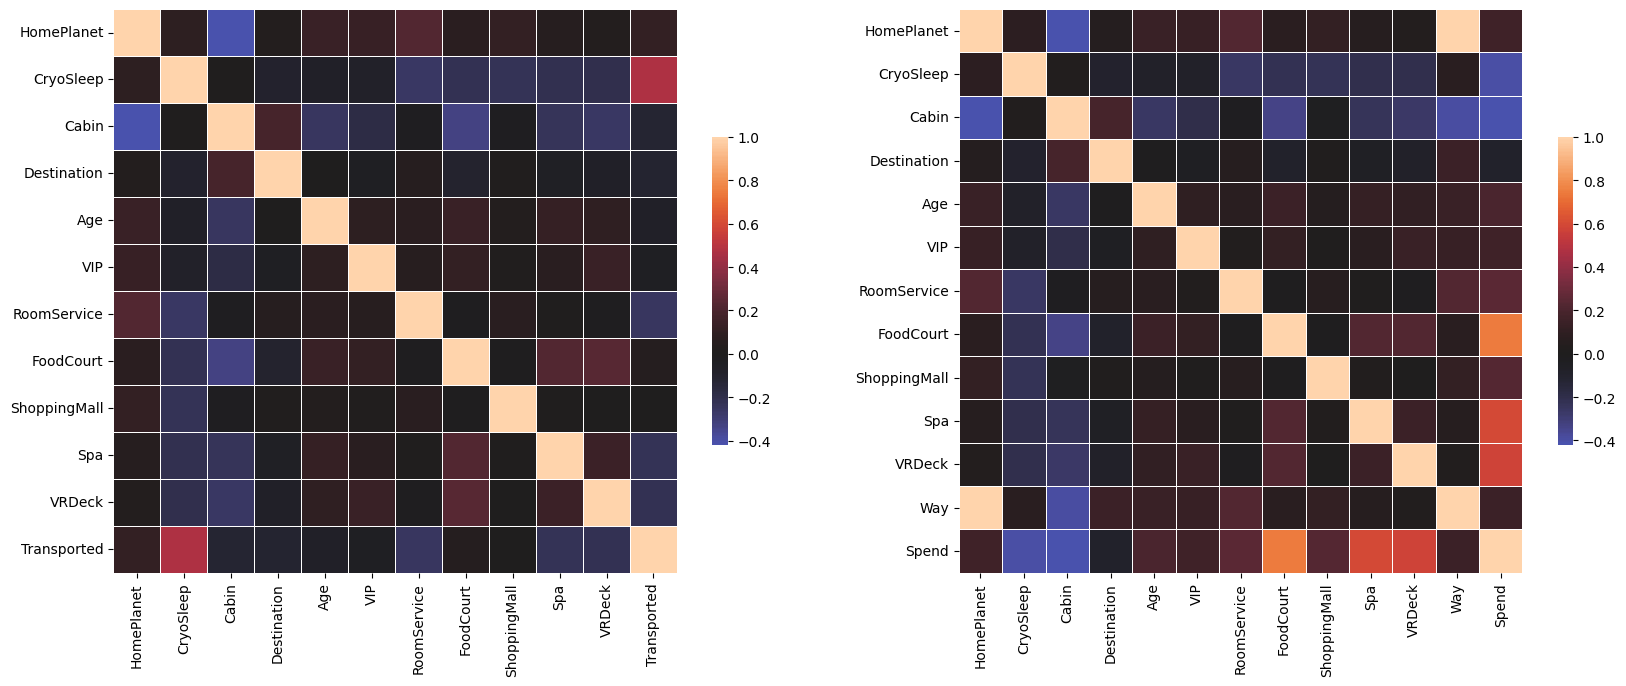

In [67]:
corr2 = data_train.corr()

fig, axs = plt.subplots(ncols = 2, figsize = (20,8))

sns.heatmap(corr1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=axs[0])
sns.heatmap(corr2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=axs[1])

In [68]:
data_test.to_csv("data/clean/data_test_prepared.csv")
data_train.to_csv("data/clean/data_train_prepared.csv")
target.to_csv("data/clean/target.csv")